In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
f = lambda x: np.sin(x)

In [33]:
x = np.pi * np.linspace(-1, 1, 5000)
y = f(x)

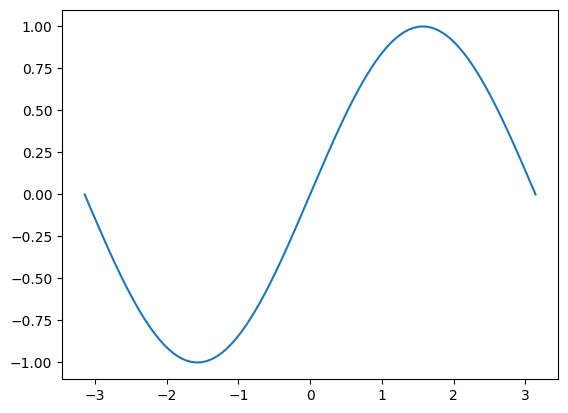

In [34]:
plt.plot(x, y)

In [35]:
random_indices = np.random.choice(np.linspace(0, len(x) - 1, len(x)), 2)
training_set_x = np.array([x[int(random_indices[0])], x[int(random_indices[1])]])
training_set_y = np.array([y[int(random_indices[0])], y[int(random_indices[1])]])

In [36]:
def calc_mean_square(m, train_x, pred_y):
    actual_y = []
    for x in train_x:
        actual_y.append(m * x)
    
    return np.square(np.subtract(actual_y, pred_y)).mean() 

In [37]:
mean_squares = []

In [38]:
hypothesis_m = np.linspace(-5, 5, 1000)

for m in hypothesis_m:
    mean_squares.append((m, calc_mean_square(m, training_set_x, training_set_y)))

In [39]:
def calc_min_mean_square(mean_square_arr):
    min_mean_square = float('inf')
    min_m = float('inf')

    for m, mean_square in mean_square_arr:
        if mean_square < min_mean_square:
            min_mean_square = mean_square
            min_m = m
    
    return min_m

In [40]:
mean_squares_arr = []

In [41]:
def run_trial():
    random_indices = np.random.choice(np.linspace(0, len(x) - 1, len(x)), 2)
    training_set_x = np.array([x[int(random_indices[0])], x[int(random_indices[1])]])
    training_set_y = np.array([y[int(random_indices[0])], y[int(random_indices[1])]])
    
    mean_squares = []
    
    for m in hypothesis_m:
        mean_squares.append((m, calc_mean_square(m, training_set_x, training_set_y)))
    
    mean_squares_arr.append(calc_min_mean_square(mean_squares))

In [42]:
for i in range(10000):
    run_trial()

In [46]:
a_hat = np.mean(mean_squares_arr)
a_hat

0.4506566566566565

In [44]:
x_fine_range = np.linspace(-1, 1, 100000)
bias = np.average((a_hat * x_fine_range - np.sin(np.pi * x_fine_range))**2 )
bias

0.28079942557307813

In [45]:
var_list = []
for a in mean_squares_arr:
    var = np.average((x_fine_range * a - a_hat * x_fine_range) ** 2)
    var_list.append(var)

print(np.average(var_list))

0.02415134645276338
